In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [2]:
# station code로 자르는 데이터
import numpy as np

import pandas as pd
import pandas_profiling
df = pd.read_excel('/gdrive/My Drive/Colab Notebooks/dust_project/2010_2017_dataset.xlsx')
#df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/dust_project/2010_2017_dataset.csv', encoding = 'cp949')

# df = df.loc[df['Station code'] == 111121, : ]
df

,location,year,month,day,SO2,CO,O3,NO2,PM10,temp,prec,cbwd,ws,humi,pres,kospi,gasoline,kerosene,bunker,LPG,oil
0,강남구,2010,1,1,0.006,0.6,0.007,0.037,36.0,-7.6,NaN,70.0,1.9,48.0,1010.6,NaN,794,224,32,880,7452
1,강남구,2010,1,2,0.008,0.6,0.008,0.037,56.0,-3.6,1.4,290.0,2.8,76.4,1006.2,NaN,794,224,32,880,7452
2,강남구,2010,1,3,0.007,0.7,0.012,0.041,50.0,-6.8,NaN,290.0,2.2,49.3,1010.7,NaN,794,224,32,880,7452
3,강남구,2010,1,4,0.005,0.6,0.009,0.042,38.0,-5.9,14.2,320.0,3.0,84.1,1002.4,1696.14,794,224,32,880,7452
4,강남구,2010,1,5,0.006,0.5,0.017,0.032,50.0,-9.9,0.0,290.0,2.9,66.4,1011.4,1690.62,794,224,32,880,7452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73045,중랑구,2017,12,27,0.006,0.5,0.013,0.027,31.0,-6.9,NaN,270.0,1.9,31.4,1019.3,2436.67,777,95,54,739,3476
73046,중랑구,2017,12,28,0.006,0.8,0.004,0.047,50.0,-2.1,0.0,320.0,1.3,47.0,1019.0,2467.49,777,95,54,739,3476
73047,중랑구,2017,12,29,0.007,1.0,0.006,0.058,104.0,2.1,0.0,290.0,1.1,67.0,1016.1,NaN,777,95,54,739,3476
73048,중랑구,2017,12,30,0.006,1.0,0.004,0.054,141.0,1.4,0.7,290.0,0.9,79.5,1013.9,NaN,777,95,54,739,3476


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73050 entries, 0 to 73049
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  73050 non-null  object 
 1   year      73050 non-null  int64  
 2   month     73050 non-null  int64  
 3   day       73050 non-null  int64  
 4   SO2       72410 non-null  float64
 5   CO        72348 non-null  float64
 6   O3        72323 non-null  float64
 7   NO2       72449 non-null  float64
 8   PM10      72439 non-null  float64
 9   temp      73050 non-null  float64
 10  prec      28925 non-null  float64
 11  cbwd      73000 non-null  float64
 12  ws        72975 non-null  float64
 13  humi      73050 non-null  float64
 14  pres      73025 non-null  float64
 15  kospi     49400 non-null  float64
 16  gasoline  73050 non-null  int64  
 17  kerosene  73050 non-null  int64  
 18  bunker    73050 non-null  int64  
 19  LPG       73050 non-null  int64  
 20  oil       73050 non-null  in

In [4]:
df = df.drop(columns = ['kospi', 'prec'])
df = df.loc[df['location'] == '강남구', : ]

In [5]:
df = df.interpolate()
df

,location,year,month,day,SO2,CO,O3,NO2,PM10,temp,cbwd,ws,humi,pres,gasoline,kerosene,bunker,LPG,oil
0,강남구,2010,1,1,0.006,0.6,0.007,0.037,36.0,-7.6,70.0,1.9,48.0,1010.6,794,224,32,880,7452
1,강남구,2010,1,2,0.008,0.6,0.008,0.037,56.0,-3.6,290.0,2.8,76.4,1006.2,794,224,32,880,7452
2,강남구,2010,1,3,0.007,0.7,0.012,0.041,50.0,-6.8,290.0,2.2,49.3,1010.7,794,224,32,880,7452
3,강남구,2010,1,4,0.005,0.6,0.009,0.042,38.0,-5.9,320.0,3.0,84.1,1002.4,794,224,32,880,7452
4,강남구,2010,1,5,0.006,0.5,0.017,0.032,50.0,-9.9,290.0,2.9,66.4,1011.4,794,224,32,880,7452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,강남구,2017,12,27,0.005,0.4,0.010,0.026,21.0,-6.9,270.0,1.9,31.4,1019.3,777,95,54,739,7837
2918,강남구,2017,12,28,0.005,0.7,0.004,0.045,38.0,-2.1,320.0,1.3,47.0,1019.0,777,95,54,739,7837
2919,강남구,2017,12,29,0.007,0.9,0.004,0.057,79.0,2.1,290.0,1.1,67.0,1016.1,777,95,54,739,7837
2920,강남구,2017,12,30,0.006,0.9,0.003,0.053,110.0,1.4,290.0,0.9,79.5,1013.9,777,95,54,739,7837


In [7]:
df = df.drop(columns = ['year', 'day'])
df

KeyError: ignored

In [ ]:
#df = df.drop(columns = ['month'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2922 entries, 0 to 2921
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SO2       2922 non-null   float64
 1   CO        2922 non-null   float64
 2   O3        2922 non-null   float64
 3   NO2       2922 non-null   float64
 4   PM10      2922 non-null   float64
 5   temp      2922 non-null   float64
 6   cbwd      2922 non-null   float64
 7   ws        2922 non-null   float64
 8   humi      2922 non-null   float64
 9   pres      2922 non-null   float64
 10  gasoline  2922 non-null   int64  
 11  kerosene  2922 non-null   int64  
 12  bunker    2922 non-null   int64  
 13  LPG       2922 non-null   int64  
 14  oil       2922 non-null   int64  
dtypes: float64(10), int64(5)
memory usage: 365.2 KB


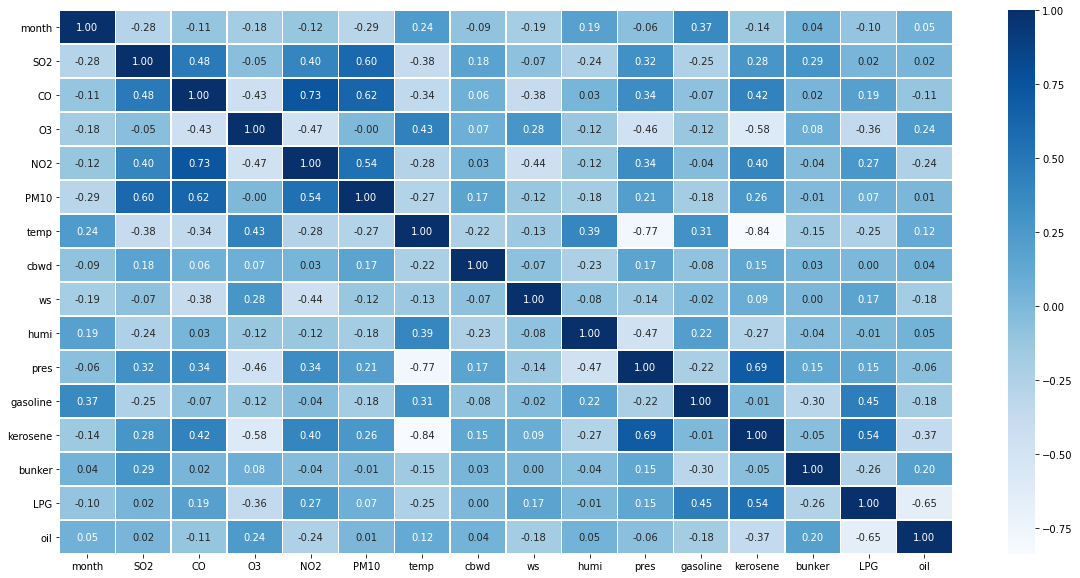

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(method='spearman'), annot=True,fmt='.2f', linewidths=.5, cmap='Blues')

In [14]:
# minmaxscaler
# 0,1 사이로
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler_col = ['month', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'temp', 'cbwd', 'ws', 'humi', 
              'pres', 'gasoline', 'kerosene', 'bunker', 'LPG', 'oil']
df_scaled = scaler.fit_transform(df[scaler_col])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scaler_col

df_scaled.head()

,month,SO2,CO,O3,NO2,PM10,temp,cbwd,ws,humi,pres,gasoline,kerosene,bunker,LPG,oil
0,0.0,0.227273,0.3125,0.071429,0.352273,0.057041,0.149028,0.147059,0.151515,0.350063,0.646288,0.284211,0.81749,0.022021,0.65873,0.095117
1,0.0,0.318182,0.3125,0.083333,0.352273,0.092692,0.235421,0.794118,0.287879,0.706399,0.550218,0.284211,0.81749,0.022021,0.65873,0.095117
2,0.0,0.272727,0.3750,0.130952,0.397727,0.081996,0.166307,0.794118,0.196970,0.366374,0.648472,0.284211,0.81749,0.022021,0.65873,0.095117
3,0.0,0.181818,0.3125,0.095238,0.409091,0.060606,0.185745,0.882353,0.318182,0.803011,0.467249,0.284211,0.81749,0.022021,0.65873,0.095117
4,0.0,0.227273,0.2500,0.190476,0.295455,0.081996,0.099352,0.794118,0.303030,0.580928,0.663755,0.284211,0.81749,0.022021,0.65873,0.095117


In [26]:
x = df[['month', 'temp', 'ws', 'humi', 'pres', 'cbwd', 'gasoline', 'kerosene', 'bunker', 'LPG', 'oil']]

y = df[['PM10']]
#y = df[['SO2', 'CO',	'O3',	'NO2', 'PM10']]
#x['prec'][0] = 0
print(x)
print(y)

      month  temp   ws  humi    pres  ...  gasoline  kerosene  bunker  LPG   oil
0         1  -7.6  1.9  48.0  1010.6  ...       794       224      32  880  7452
1         1  -3.6  2.8  76.4  1006.2  ...       794       224      32  880  7452
2         1  -6.8  2.2  49.3  1010.7  ...       794       224      32  880  7452
3         1  -5.9  3.0  84.1  1002.4  ...       794       224      32  880  7452
4         1  -9.9  2.9  66.4  1011.4  ...       794       224      32  880  7452
...     ...   ...  ...   ...     ...  ...       ...       ...     ...  ...   ...
2917     12  -6.9  1.9  31.4  1019.3  ...       777        95      54  739  7837
2918     12  -2.1  1.3  47.0  1019.0  ...       777        95      54  739  7837
2919     12   2.1  1.1  67.0  1016.1  ...       777        95      54  739  7837
2920     12   1.4  0.9  79.5  1013.9  ...       777        95      54  739  7837
2921     12  -0.3  2.3  54.4  1012.8  ...       777        95      54  739  7837

[2922 rows x 11 columns]
  

In [27]:
# print("------numpy change-------")
x = x.to_numpy()
y = y.to_numpy()

# split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

In [28]:
x_train.shape

(1753, 11)

In [29]:
y_train.shape

(1753, 1)

In [30]:
# 2. 모델 구성
from keras.models import Sequential
from keras.layers import Dense
import keras

model = Sequential([
    keras.layers.Dense(300, input_dim=11, activation='relu'),
    keras.layers.Dense(300, activation='relu'),   # hidden layer 1
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 300)               3600      
_________________________________________________________________
dense_13 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 301       
Total params: 94,201
Trainable params: 94,201
Non-trainable params: 0
_________________________________________________________________


In [22]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
# 노드의 개수, hidden layer 300,500


model.add(Dense(100, input_shape=(11, ), activation='relu'))
model.add(Dense(100))
model.add(Dense(5))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 505       
Total params: 11,805
Trainable params: 11,805
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/100
55/55 [==============================] - 2s 9ms/step - loss: 2848.1587 - mse: 2848.1587 - val_loss: 3065.7805 - val_mse: 3065.7805
Epoch 2/100
55/55 [==============================] - 0s 3ms/step - loss: 3325.5780 - mse: 3325.5780 - val_loss: 3065.7805 - val_mse: 3065.7805
Epoch 3/100
55/55 [==============================] - 0s 5ms/step - loss: 3126.7743 - mse: 3126.7743 - val_loss: 3065.7805 - val_mse: 3065.7805
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 3111.4409 - mse: 3111.4409 - val_loss: 3065.7805 - val_mse: 3065.7805
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: 3087.6728 - mse: 3087.6728 - val_loss: 3065.7805 - val_mse: 3065.7805
Epoch 6/100
55/55 [==============================] - 0s 5ms/step - loss: 3372.9569 - mse: 3372.9569 - val_loss: 3065.7805 - val_mse: 3065.7805
Epoch 7/100
55/55 [==============================] - 0s 4ms/step - loss: 3009.8554 - mse: 3009.8554 - val_loss: 3065.7805 - val_mse: 3065.7805

In [32]:
# 4. 평가 예측
loss, mse = model.evaluate(x_test, y_test, batch_size=64)
print('acc : ', mse)
 
y_predict = model.predict(x_test)
print(y_predict)
 
# RMSE 구하기
from sklearn.metrics import mean_squared_error
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))
print('RMSE : ', RMSE(y_test, y_predict)) 
 
# R2 구하기
from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, y_predict)
print('R2 : ', r2_y_predict)

10/10 [==============================] - 0s 2ms/step - loss: 3106.7419 - mse: 3106.7419
acc :  3106.741943359375
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]